# Assignment 3: CNN

In [171]:
import subprocess
import numpy as np
import itertools
np.random.seed(777)

import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential, load_model
from keras.callbacks import History, EarlyStopping 
fit_hist = History()
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')
from sklearn.metrics import confusion_matrix

# Plotting
import matplotlib.pyplot as plt
from IPython.display import Image
plt.style.use('bmh')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Set up data generator

In [172]:
data_gen = ImageDataGenerator(rescale = 1.0/255)

In [193]:
imgdir = 'a3_images'
img_size = 128
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle=True)

validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


CNN function

In [194]:
def make_convnet():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(img_size, img_size, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    return model


Initialise CNN (NB: Remember to do this each time before benchmarking)

In [195]:
conv = make_convnet()

### Save weights and re-load weights

In [176]:
conv.save_weights('weights.h5')

In [177]:
model2 = make_convnet()

In [178]:
model2.load_weights('weights.h5')

In [179]:
model2.evaluate_generator(validation_generator, steps = 576/batch_size)

[0.6927145620187124, 0.5364583333333334]

### Plotting accuracy and loss functions

In [196]:
history = conv.fit_generator(generator=train_generator, validation_data=validation_generator, epochs = 20,
                   steps_per_epoch=1600/batch_size, validation_steps=576/batch_size, callbacks=[earlyStopping])

Epoch 1/20
50/50 [==============================] - 173s 3s/step - loss: 0.8645 - acc: 0.5750 - val_loss: 0.6346 - val_acc: 0.6389
Epoch 2/20
50/50 [==============================] - 176s 4s/step - loss: 0.6283 - acc: 0.6850 - val_loss: 0.5894 - val_acc: 0.6771
Epoch 3/20
50/50 [==============================] - 172s 3s/step - loss: 0.5452 - acc: 0.7306 - val_loss: 0.5471 - val_acc: 0.7483
Epoch 4/20
50/50 [==============================] - 185s 4s/step - loss: 0.5142 - acc: 0.7631 - val_loss: 0.7429 - val_acc: 0.6337
Epoch 5/20
50/50 [==============================] - 151s 3s/step - loss: 0.4610 - acc: 0.8056 - val_loss: 0.5008 - val_acc: 0.7726
Epoch 6/20
50/50 [==============================] - 140s 3s/step - loss: 0.3501 - acc: 0.8481 - val_loss: 0.5618 - val_acc: 0.7708
Epoch 7/20
50/50 [==============================] - 160s 3s/step - loss: 0.2908 - acc: 0.8806 - val_loss: 0.5756 - val_acc: 0.7708
Epoch 8/20
50/50 [==============================] - 188s 4s/step - loss: 0.2658 - a

In [28]:
def acc_loss_plot(history, name):
    plt.figure(figsize=(10,5))
    #accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    #losses
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.tight_layout()
    plt.savefig(name+'.png')

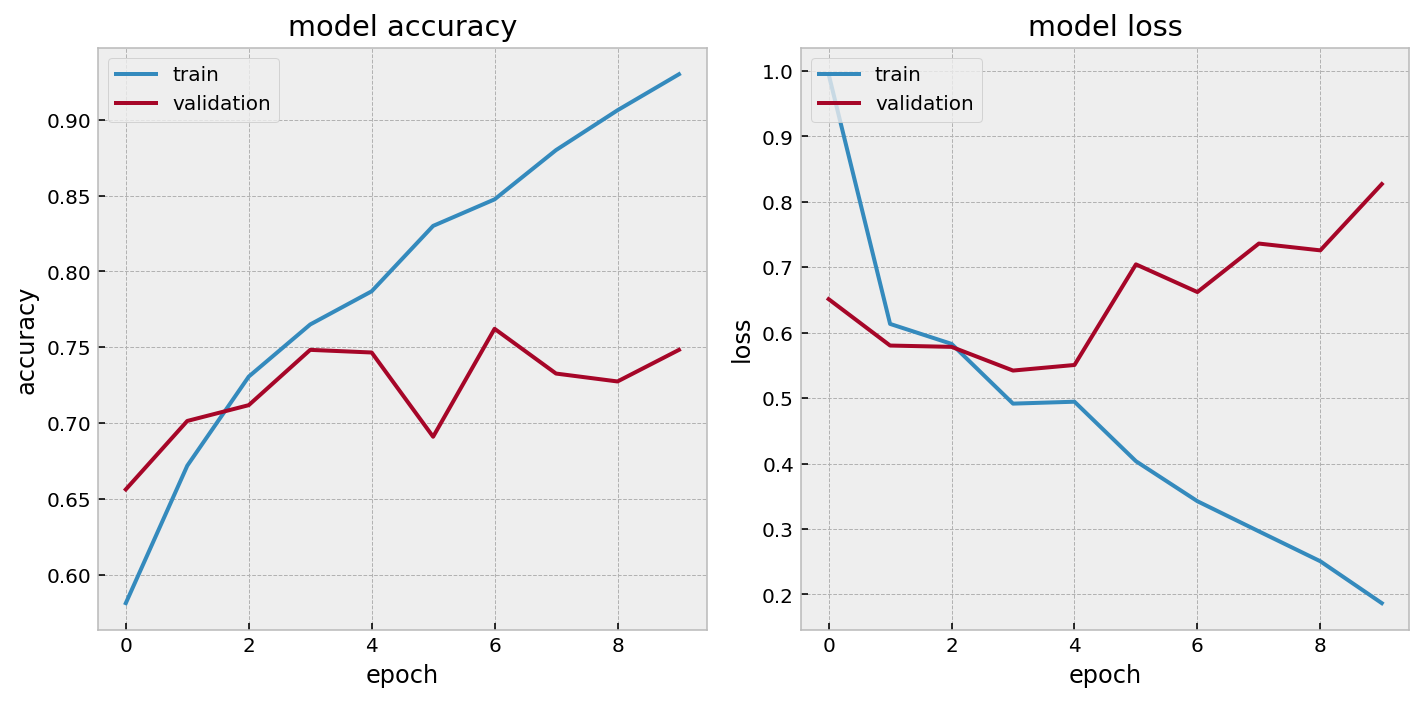

In [65]:
acc_loss_plot(history, '10epochsmodel1dropout')

### Data Augmentation

In [185]:
aug_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1.0/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [186]:
train_gen_v2 = aug_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [187]:
conv = make_convnet()

In [188]:
history_aug = conv.fit_generator(generator=train_gen_v2, validation_data=validation_generator, epochs = 20,
                   steps_per_epoch=1600/batch_size, validation_steps=576/batch_size, callbacks = [earlyStopping])

Epoch 1/20
50/50 [==============================] - 37s 740ms/step - loss: 0.8052 - acc: 0.5494 - val_loss: 0.6429 - val_acc: 0.6562
Epoch 2/20
50/50 [==============================] - 38s 769ms/step - loss: 0.6823 - acc: 0.6150 - val_loss: 0.6325 - val_acc: 0.6719
Epoch 3/20
50/50 [==============================] - 37s 735ms/step - loss: 0.6554 - acc: 0.6494 - val_loss: 0.6303 - val_acc: 0.6858
Epoch 4/20
50/50 [==============================] - 33s 666ms/step - loss: 0.6315 - acc: 0.6819 - val_loss: 0.6073 - val_acc: 0.7049
Epoch 5/20
50/50 [==============================] - 33s 670ms/step - loss: 0.6149 - acc: 0.6950 - val_loss: 0.5833 - val_acc: 0.7101
Epoch 6/20
50/50 [==============================] - 34s 689ms/step - loss: 0.6090 - acc: 0.6900 - val_loss: 0.5917 - val_acc: 0.6719
Epoch 7/20
50/50 [==============================] - 41s 828ms/step - loss: 0.6089 - acc: 0.6725 - val_loss: 0.5703 - val_acc: 0.7483
Epoch 8/20
50/50 [==============================] - 39s 773ms/step - 

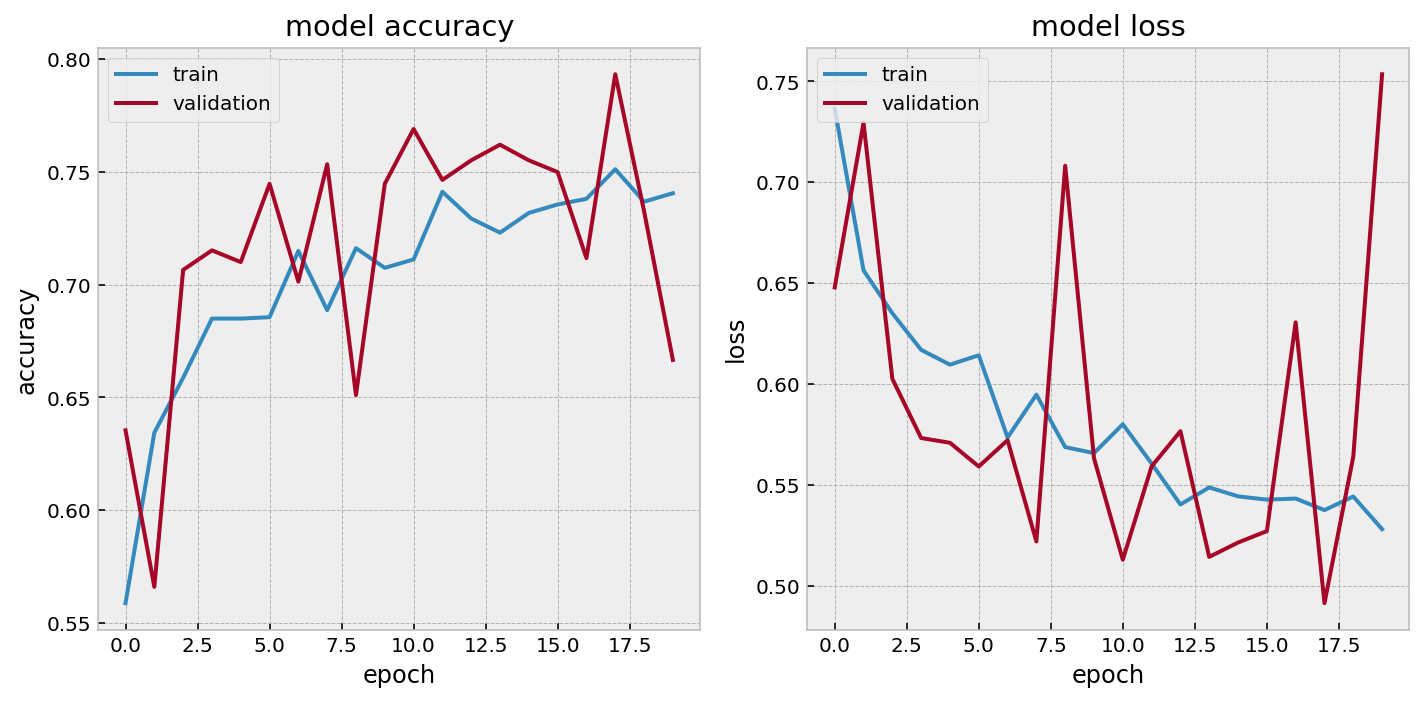

In [38]:
acc_loss_plot(history_aug, '20epochsmodeldataaugment')

## VGG16

In [39]:
from keras import applications
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

Testing the model

In [163]:
img = load_img('./a3_images/validation/other/0029.jpg',
         target_size=(224,224))

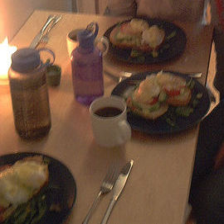

In [164]:
img

In [165]:
img_array = img_to_array(img)

In [166]:
img_array = preprocess_input(img_array)

In [167]:
img_array = img_array.reshape(1, 224, 224, 3)

In [168]:
prediction = vggmodel.predict(img_array)

In [169]:
output = decode_predictions(prediction, 10)

In [170]:
output

[[('n07717410', 'acorn_squash', 0.075869024),
  ('n03201208', 'dining_table', 0.069568165),
  ('n03400231', 'frying_pan', 0.06451982),
  ('n04270147', 'spatula', 0.056969233),
  ('n03633091', 'ladle', 0.056154195),
  ('n07579787', 'plate', 0.04864006),
  ('n04596742', 'wok', 0.040209822),
  ('n03041632', 'cleaver', 0.031108359),
  ('n07717556', 'butternut_squash', 0.027908659),
  ('n04597913', 'wooden_spoon', 0.02720128)]]

Extract features from VGG16

In [48]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

In [49]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [50]:
def create_vgg16_features(f_name, n, f_extractor=feature_extractor):
    gen = vgg_data_gen.flow_from_directory(
        imgdir + '/{:s}'.format(f_name),
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle=False)
    features = feature_extractor.predict_generator(gen, steps=n)
    #save to file
    with open('./{:s}'.format(f_name+'_feats'), 'wb') as f:
        np.save(f, features)

In [51]:
t_feats = create_vgg16_features(f_name='train', n=1600//batch_size)

Found 1600 images belonging to 2 classes.


In [52]:
v_feats = create_vgg16_features(f_name='validation', n=576//batch_size)

Found 576 images belonging to 2 classes.


Create CNN from VGG16 features

In [77]:
def make_featnet():
    model = Sequential()
    model.add(Flatten(input_shape=(2,2,512)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    return model

Plotting function confusion matrix

In [79]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



CNN Training

In [190]:
def train_on_cnnfeatures(t_fpath='./train_feats', v_fpath='./validation_feats'):
    
    featnet = make_featnet()
    
    #train_features
    with open(t_fpath, 'rb') as f:
        t_feats = np.load(f)
        
    t_labels = np.array([0] * 800 + [1] * 800)
    
    #validation_features
    with open(v_fpath, 'rb') as f:
        v_feats = np.load(f)
        
    v_labels = np.array([0] * 288 + [1] * 288)
    
    featnet.fit(t_feats, t_labels, epochs=20, validation_data=(v_feats, v_labels), callbacks=[fit_hist, earlyStopping])
    
    preds = featnet.predict_classes(v_feats)
    cnf_matrix = confusion_matrix(v_labels, preds)
    plot_confusion_matrix(cnf_matrix, classes=['other', 'car'],
                      title='Confusion matrix, without normalization')
    
    score = featnet.evaluate(v_feats, v_labels, verbose=0)
    print("Test loss: ", score[0])
    print("Test accuracy: ", score[1])
    
    return featnet

Train on 1600 samples, validate on 576 samples
Epoch 1/20
1600/1600 [==============================] - 3s 2ms/step - loss: 1.9677 - acc: 0.8375 - val_loss: 1.5986 - val_acc: 0.8646
Epoch 2/20
1600/1600 [==============================] - 1s 498us/step - loss: 1.1739 - acc: 0.9000 - val_loss: 1.1497 - val_acc: 0.9010
Epoch 3/20
1600/1600 [==============================] - 1s 509us/step - loss: 0.9689 - acc: 0.9188 - val_loss: 1.5006 - val_acc: 0.8733
Epoch 4/20
1600/1600 [==============================] - 1s 468us/step - loss: 0.8654 - acc: 0.9325 - val_loss: 1.2712 - val_acc: 0.8958
Epoch 5/20
1600/1600 [==============================] - 1s 512us/step - loss: 0.6988 - acc: 0.9425 - val_loss: 1.1352 - val_acc: 0.9080
Epoch 6/20
1600/1600 [==============================] - 1s 535us/step - loss: 0.5928 - acc: 0.9500 - val_loss: 1.0895 - val_acc: 0.9062
Epoch 7/20
1600/1600 [==============================] - 1s 511us/step - loss: 0.5248 - acc: 0.9556 - val_loss: 1.2000 - val_acc: 0.9045
Epo

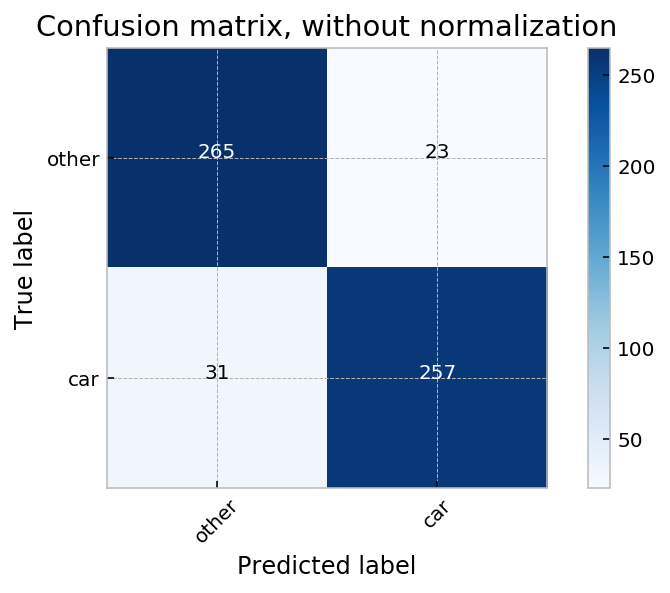

In [192]:
fitted = train_on_cnnfeatures()

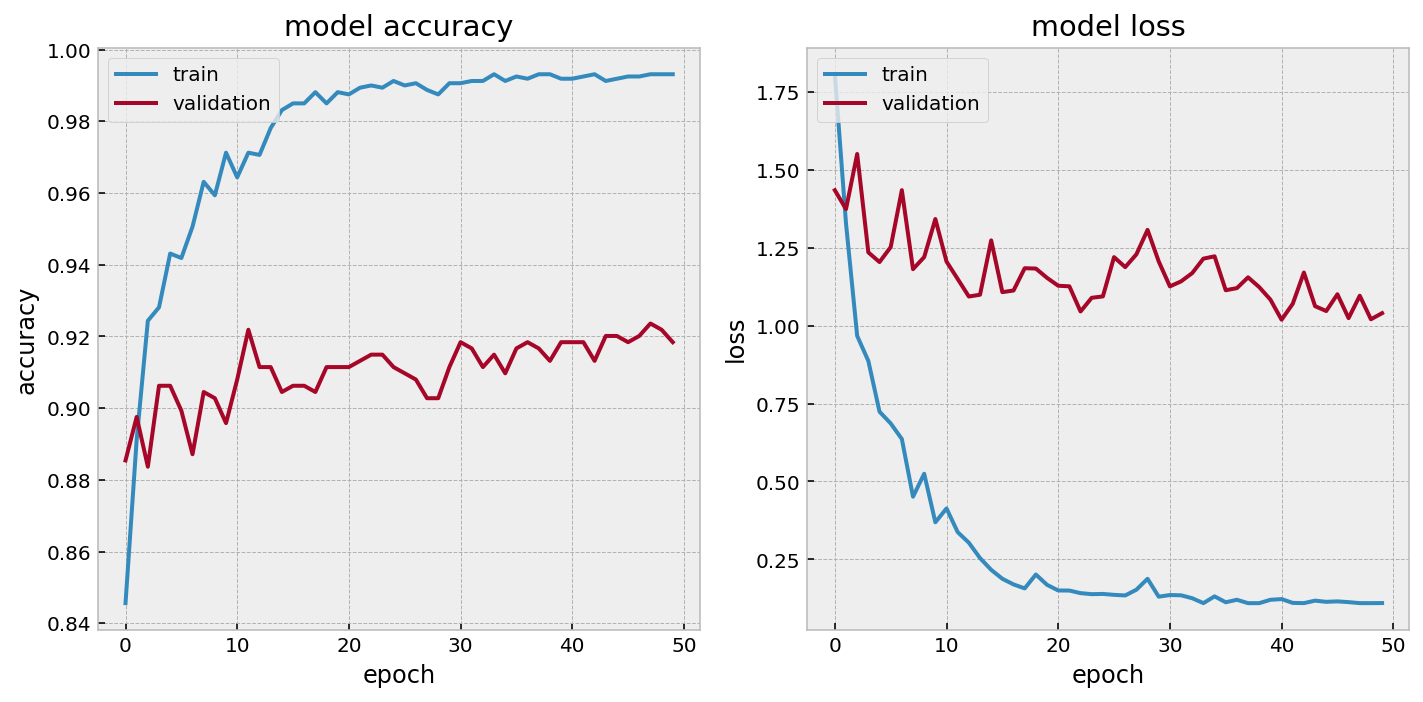

In [60]:
acc_loss_plot(fit_hist, '50epochsvgg16model1')

## Visualizing CNN features

In [155]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [156]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

In [157]:
def feature_pairplot(weights, i):
    
    pos_img = kernel_image(weights, i, True)
    neg_img = kernel_image(weights, i, False)
    
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    plt.title("Positive")
    plt.imshow(pos_img)
    plt.subplot(1, 2, 2)
    plt.title("Negative")
    plt.imshow(neg_img)

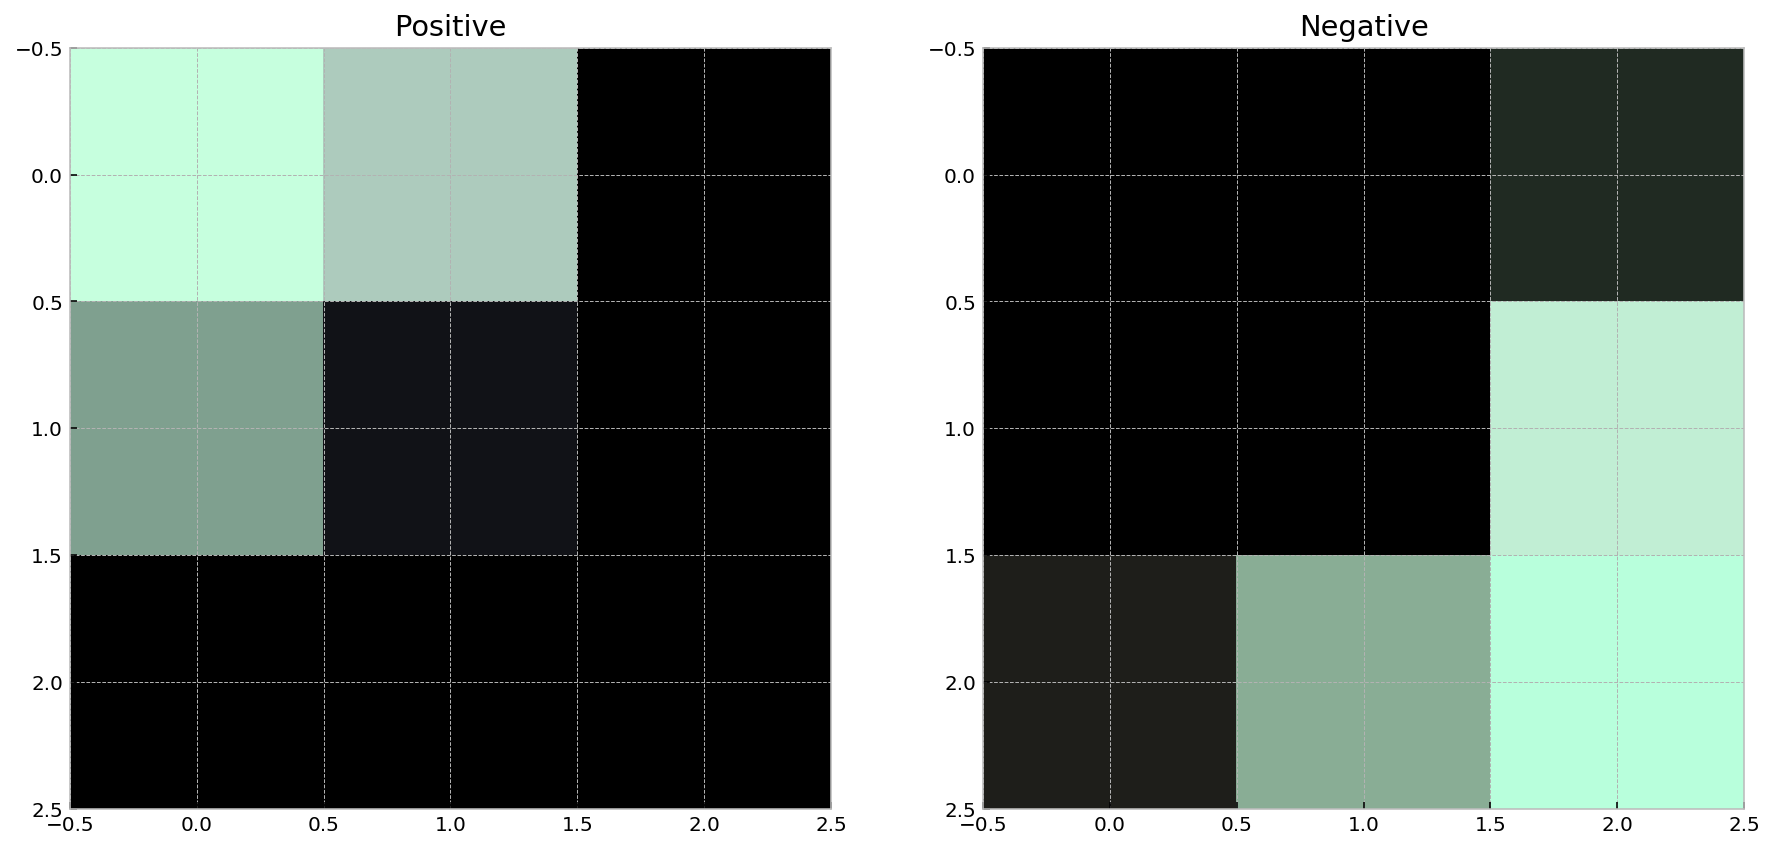

In [158]:
feature_pairplot(first_layer_weights, 0)